<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA-and-pre-processing" data-toc-modified-id="EDA-and-pre-processing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA and pre-processing</a></span></li><li><span><a href="#Data-validation" data-toc-modified-id="Data-validation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data validation</a></span><ul class="toc-item"><li><span><a href="#Data-leakage" data-toc-modified-id="Data-leakage-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data leakage</a></span></li><li><span><a href="#Data-Correlations" data-toc-modified-id="Data-Correlations-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data Correlations</a></span></li></ul></li><li><span><a href="#Model-evaluation" data-toc-modified-id="Model-evaluation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model evaluation</a></span><ul class="toc-item"><li><span><a href="#Plot-of-the-CV-folds---F1-macro-and-F1-for-the-positive-class" data-toc-modified-id="Plot-of-the-CV-folds---F1-macro-and-F1-for-the-positive-class-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Plot of the CV folds - F1 macro and F1 for the positive class</a></span></li><li><span><a href="#Scikit-learn---Classification-report" data-toc-modified-id="Scikit-learn---Classification-report-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Scikit learn - Classification report</a></span></li><li><span><a href="#ROC-curve-with-AUC" data-toc-modified-id="ROC-curve-with-AUC-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>ROC curve with AUC</a></span></li><li><span><a href="#Confusion-Matrix-plot-(normalized-and-with-absolute-values)" data-toc-modified-id="Confusion-Matrix-plot-(normalized-and-with-absolute-values)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Confusion Matrix plot (normalized and with absolute values)</a></span></li><li><span><a href="#Feature-Importance-plot" data-toc-modified-id="Feature-Importance-plot-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Feature Importance plot</a></span></li><li><span><a href="#Correlations-analysis-(on-top-features)" data-toc-modified-id="Correlations-analysis-(on-top-features)-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Correlations analysis (on top features)</a></span></li><li><span><a href="#Anomaly-detection-on-the-training-set-(on-top-features-alone)" data-toc-modified-id="Anomaly-detection-on-the-training-set-(on-top-features-alone)-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Anomaly detection on the training set (on top features alone)</a></span></li></ul></li></ul></div>

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd 
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199
from pandas_summary import DataFrameSummary
import octopus as oc 
from sklearn.metrics import classification_report

%matplotlib inline


In [5]:
XY_df=pd.read_csv('../datasets/kaggle_mortality.csv')

# EDA and pre-processing 

In [3]:
XY_df.shape

(91713, 186)

In [4]:
XY_df.head(3)

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,1

In [6]:
XY_df['hospital_death'].value_counts()

0    83798
1    7915 
Name: hospital_death, dtype: int64

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
count,91713,91713,91713,91713,87485,88284,91713,NaN,NaN,90379,NaN,NaN,91713,NaN,NaN,91713,91713,88993,37334,90051,90612,91713,90998,33579,72451,72860,20845,89812,89812,90676,89812,80677,90835,71835,90998,90719,20845,20845,20845,20845,90479,73113,87605,42715,90998,69701,23729,23729,91548,91548,90673,90673,91568,91568,23936,23936,91493,91493,90234,90234,91328,91328,91380,91380,23754,23754,91554,91554,90686,90686,89389,89389,16785,16785,88094,88094,84363,84363,88923,88923,16869,16869,87074,87074,82629,82629,87356,87356,87528,87528,16798,16798,88102,88102,84372,84372,69981,69981,42617,42617,38040,38040,81199,81199,78644,78644,81544,81544,85906,85906,76642,76642,79566,79566,80059,80059,33772,33772,23317,23317,78269,78269,82128,82128,81518,81518,78539,78539,7889,7889,7094,7094,16622,16622,15850,15850,16756,16756,39099,39099,15619,15619,18590,18590,18293,18293,33772,33772,7344,7344,16040,16040,19611,19611,19096,19096,15760,15760,32442,32442,31590,31590,32451,32451,25705,25705,

<AxesSubplot:>

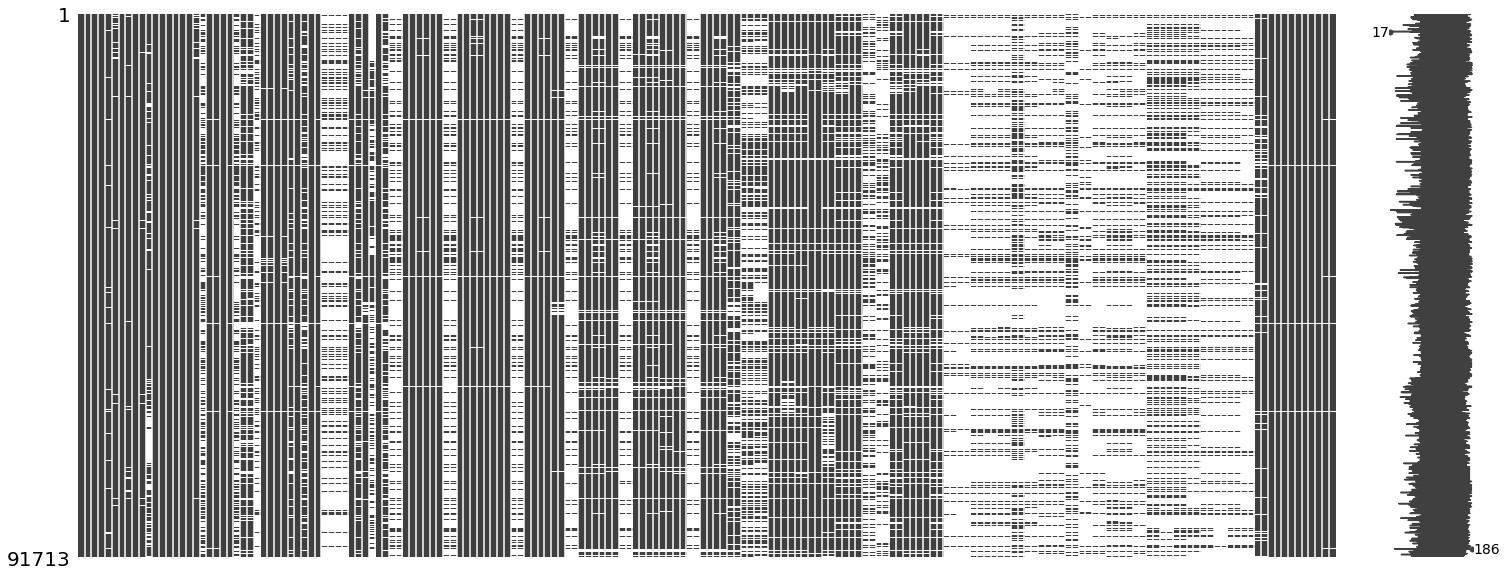

In [6]:
import missingno as msno
from pandas_summary import DataFrameSummary
dfs = DataFrameSummary(XY_df)
dfs.summary()
msno.matrix(XY_df)

In [7]:
features=XY_df.columns.to_list()
features_remove=['encounter_id','patient_id','hospital_death']
for f in features_remove:
    features.remove(f)

In [8]:
X=XY_df[features]
y=XY_df['hospital_death']

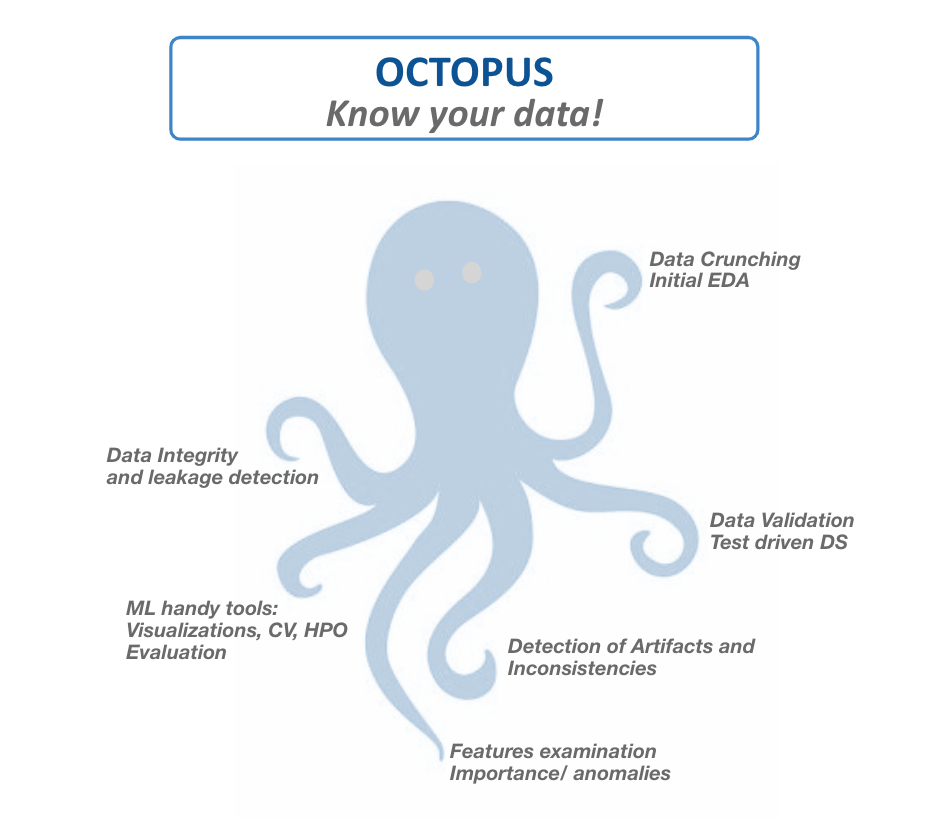

In [9]:
from IPython.display import Image
Image("../images/octopus_know_your_data.PNG", width=600, height=600)

# Data validation

## Data leakage 

In [10]:
def data_leakage(df,cols):
    CRED = '\033[91m'
    CEND = '\033[0m'
    CGREEN  = '\33[32m'    
    
    duplicateRowsDF = df[df.duplicated(cols,keep="first")]
    
    if round(len(duplicateRowsDF)/len(df)*100,2) > 0:
        print("\n-> Total number of duplicate instances:", len(duplicateRowsDF), "out of", len(df),":",CRED,round(len(duplicateRowsDF)/len(df)*100,2),"%",CEND,"\n") 
        print ("Top duplicate instances:","\n")
        df['All_features'] = df[cols].astype(str).apply(' | '.join, axis=1)
        print (df['All_features'].value_counts().head(12))

    else:
        print("->",CGREEN,"Passed the data leakage test - no duplicate intstances detected" ,CEND) 

        

## Data Correlations 

In [11]:
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

def correlations(df,cols):
    sns.set(style="white")
    corr = df[cols].corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(11, 9))
    #cmap = sns.diverging_palette(220, 10, as_cmap=True)
    cmap = sns.diverging_palette(240, 10, n=9)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

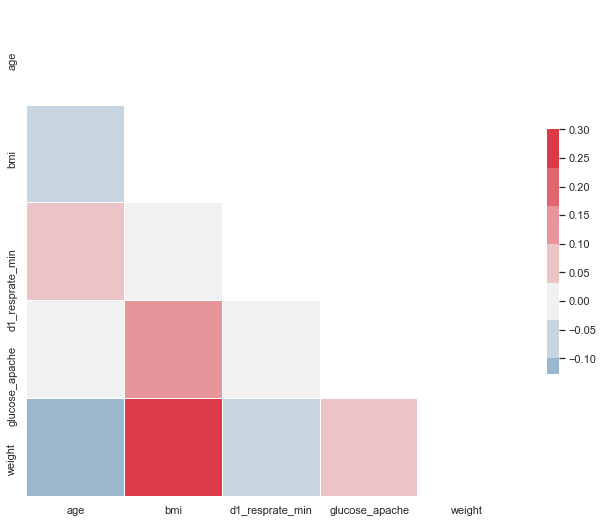

In [12]:
correlations(XY_df,['age','bmi','d1_resprate_min','glucose_apache','weight'])

In [13]:
def anomalies(df,df_cols,num=10):
    sns.set(style="white")    
    clf = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.0012), \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0 )
    clf.fit(df[df_cols].fillna(0))
    pred = clf.predict(df[df_cols].fillna(0))
    df['anomaly']=pred
    outliers=df.loc[df['anomaly']==-1]
    outlier_index=list(outliers.index)
    print('Number of anomalies: ',len((df[df['anomaly']==-1])))
    from sklearn.decomposition import PCA
    
    #Visualization

    from sklearn.manifold import TSNE
    tsne = TSNE(n_components=2, random_state=0)


    tsne_obj= tsne.fit_transform(df[df_cols].fillna(0))
    sns.scatterplot(x="X", y="Y",
              hue="hospital_death",
              palette=['dodgerblue','green'],
                       #'orange','brown','blue',
                       #'dodgerblue','green','lightgreen','darkcyan', 'black'],
                    legend='full',data=tsne_df);



In [15]:
print (anomalies(XY_df,['age','bmi','d1_resprate_min','glucose_apache','weight']))

Number of anomalies:  111


KeyboardInterrupt: 

In [ ]:
data_validation(XY_df,features)

# Model evaluation 

## Plot of the CV folds - F1 macro and F1 for the positive class 
(in this case it's an unbalanced dataset)

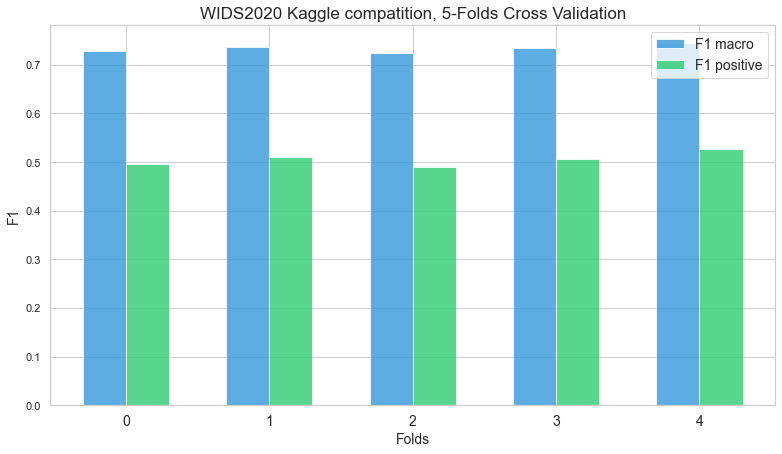

In [77]:
oc.cv_plot(arr_f1_weighted,arr_f1_macro,arr_f1_positive,'WIDS2020 Kaggle compatition')

## Scikit learn - Classification report 

In [78]:
print(classification_report(y_folds, prediction_folds))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     83798
           1       0.65      0.41      0.51      7915

    accuracy                           0.93     91713
   macro avg       0.80      0.70      0.73     91713
weighted avg       0.92      0.93      0.92     91713



## ROC curve with AUC

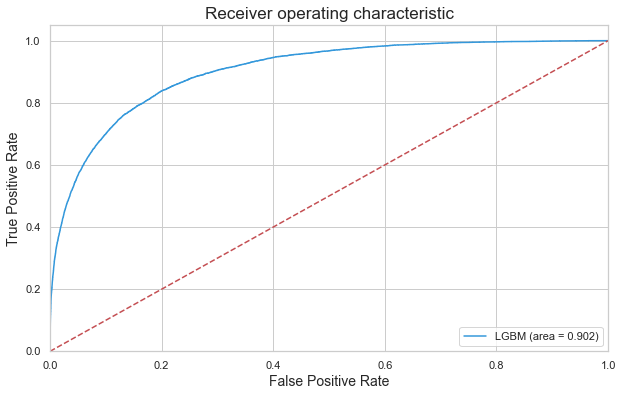

In [79]:
oc.roc_curve_plot(y_folds,preds_folds)

## Confusion Matrix plot (normalized and with absolute values) 

<Figure size 432x288 with 0 Axes>

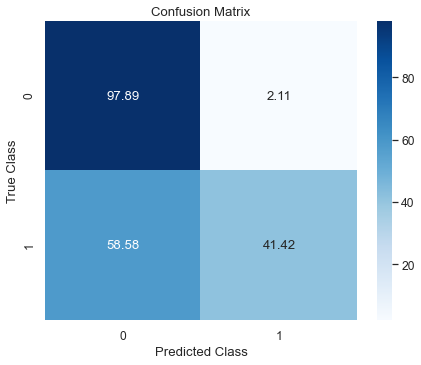

<Figure size 432x288 with 0 Axes>

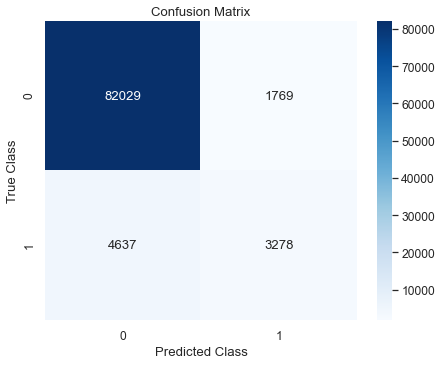

In [80]:
oc.confusion_matrix_plot(y_folds,prediction_folds)

## Feature Importance plot 

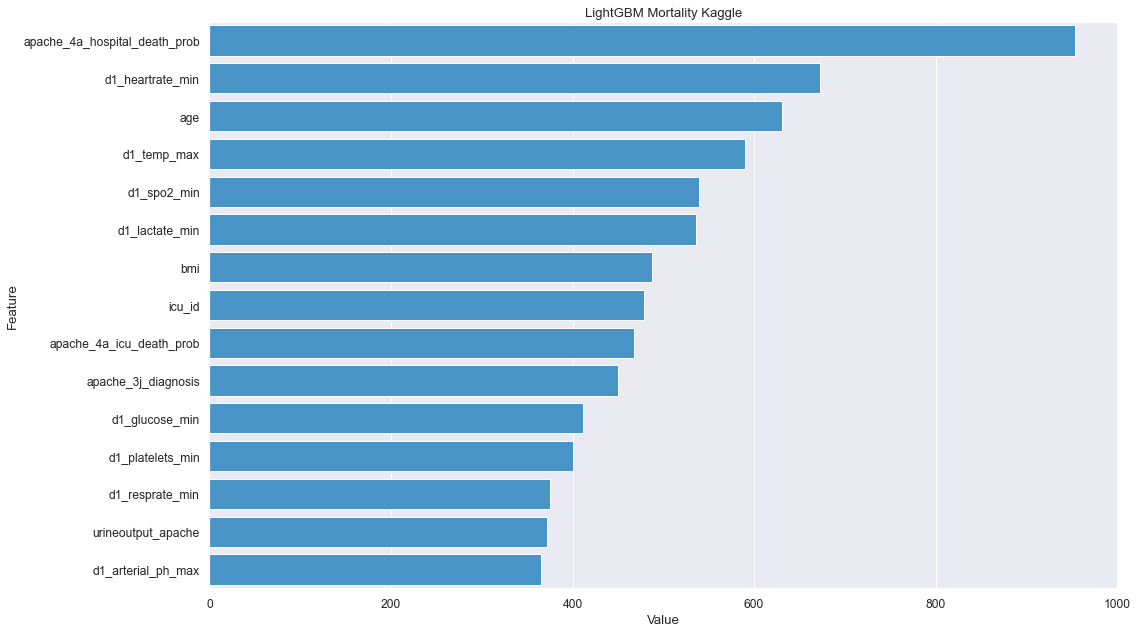

In [93]:
feature_imp_list=oc.plot_imp(clf,X,'LightGBM Mortality Kaggle',num=15)

In [84]:
top_features=feature_imp_list.sort_values(by='Value', ascending=False).head(15)

In [85]:
top_features

,Value,Feature
171,404,apache_4a_hospital_death_prob
1,318,age
50,290,d1_heartrate_min
67,268,d1_temp_max
60,242,d1_spo2_min
2,240,bmi
9,236,icu_id
116,214,d1_lactate_min
118,213,d1_platelets_min
172,210,apache_4a_icu_death_prob


## Correlations analysis (on top features)

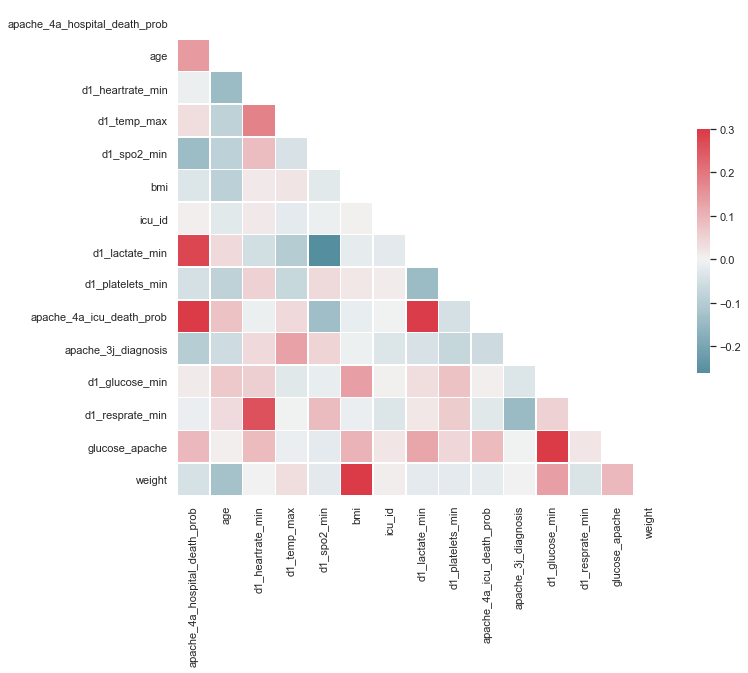

In [86]:
oc.corralations(X,top_features['Feature'])

## Anomaly detection on the training set (on top features alone) 

In [87]:
anomalies(X,top_features['Feature'])

[ 1 -1  1 ...  1  1 -1]


,apache_4a_hospital_death_prob,age,d1_heartrate_min,d1_temp_max,d1_spo2_min,bmi,icu_id,d1_lactate_min,d1_platelets_min,apache_4a_icu_death_prob,apache_3j_diagnosis,d1_glucose_min,d1_resprate_min,glucose_apache,weight
0,0.10,68.0,72.0,39.9,74.0,22.730000,92,1.0,233.0,0.05,502.01,109.0,10.0,168.0,73.9
2,0.00,25.0,68.0,37.0,91.0,31.950000,93,NaN,NaN,0.00,703.03,NaN,8.0,NaN,95.3
3,0.04,81.0,92.0,38.0,95.0,22.640000,92,NaN,43.0,0.03,1206.03,88.0,7.0,185.0,61.7
5,0.05,67.0,83.0,36.8,91.0,27.560000,95,NaN,159.0,0.02,403.01,125.0,10.0,156.0,100.0
6,0.10,59.0,70.0,37.2,87.0,57.450000,95,NaN,278.0,0.05,203.01,129.0,16.0,197.0,156.6
9,0.02,50.0,57.0,37.1,96.0,25.710000,114,NaN,232.0,0.01,107.01,134.0,14.0,134.0,79.0
10,0.01,72.0,67.0,37.0,92.0,28.257052,113,NaN,257.0,0.00,1304.08,133.0,14.0,NaN,67.8
11,0.04,80.0,59.0,36.9,76.0,27.382812,95,NaN,NaN,0.01,1505.02,100.0,16.0,123.0,70.1
12,0.03,48.0,66.0,36.9,97.0,NaN,102,NaN,199.0,0.01,403.01,98.0,10.0,98.0,NaN
14,0.03,81.0,92.0,37.1,89.0,38.189067,97,NaN,288.0,0.01,1304.05,120.0,16.0,120.0,113.9
